In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [15]:
df = pd.read_csv('WineQT.csv')

In [16]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [17]:
df = df.drop(['Id'],axis = 1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [19]:
X = df.drop(['quality'], axis = 1)
y = df['quality']

In [21]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [26]:
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
X = ss.fit_transform(X)

In [27]:
y = ss.fit_transform(np.array(y).reshape(-1,1))

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.30,random_state = 1)

In [30]:
model = Sequential()

model.add(Dense(512, activation = 'relu', input_shape = (11,)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1,activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

c:\Users\rahul\Downloads\ANN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
history = model.fit(X_train,y_train,epochs = 100,validation_data = (X_val,y_val))

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.2824 - val_mean_squared_error: 0.2824
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0933 - mean_squared_error: 0.0933 - val_loss: 0.2785 - val_mean_squared_error: 0.2785
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0568 - mean_squared_error: 0.0568 - val_loss: 0.2840 - val_mean_squared_error: 0.2840
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0531 - mean_squared_error: 0.0531 - val_loss: 0.2792 - val_mean_squared_error: 0.2792
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 0.2621 - val_mean_squared_error: 0.2621
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.2336 - val_mean_squared_error: 0.2336
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.2159 - v

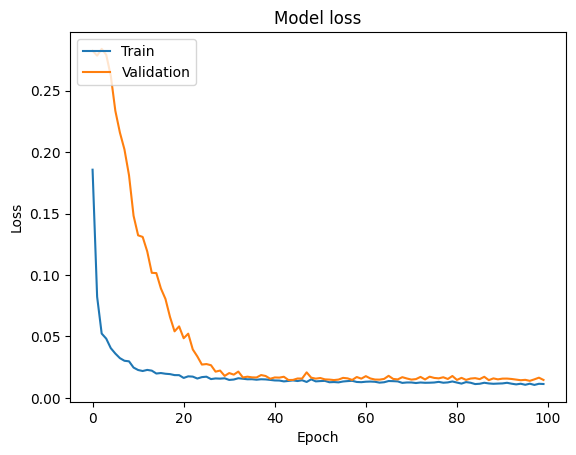

In [34]:
plt.plot(history.history['loss'])    
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()